In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df = pd.read_excel('data/waluty.xlsx', parse_dates=['Date'], index_col='Date')

In [23]:
print(df.columns)
print(df.index)

Index(['\nSwiss franc', 'Euro', 'South Korean won', 'British Pound',
       'U.S. Dollar ', 'Australian dollar', 'Ukrainian hryvnia',
       'dinar from Kuwait', 'Norwegian krone', 'Swedish krone'],
      dtype='object')
DatetimeIndex(['2024-06-21', '2024-06-20', '2024-06-19', '2024-06-18',
               '2024-06-17', '2024-06-14', '2024-06-13', '2024-06-12',
               '2024-06-11', '2024-06-10',
               ...
               '2023-07-06', '2023-07-05', '2023-07-04', '2023-07-03',
               '2023-06-30', '2023-06-29', '2023-06-28', '2023-06-27',
               '2023-06-26', '2023-06-23'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


In [24]:
df

,\nSwiss franc,Euro,South Korean won,British Pound,U.S. Dollar,Australian dollar,Ukrainian hryvnia,dinar from Kuwait,Norwegian krone,Swedish krone
Date,,,,,,,,,,
2024-06-21,4.5437,4.3331,0.2917,5.1291,4.0527,2.6965,0.1001,NaN,0.3841,0.3862
2024-06-20,4.5359,4.3238,0.2910,5.1224,4.0345,2.6900,0.0995,NaN,0.3825,0.3856
2024-06-19,4.5671,4.3376,0.2926,5.1421,4.0387,2.6942,0.0996,13.1782,0.3816,0.3871
2024-06-18,4.5614,4.3468,0.2928,5.1423,4.0549,2.6833,0.1000,NaN,0.3793,0.3861
2024-06-17,4.5670,4.3608,0.2951,5.1616,4.0728,2.6904,0.1003,NaN,0.3803,0.3865
...,...,...,...,...,...,...,...,...,...,...
2023-06-29,4.5531,4.4568,0.3102,5.1643,4.0832,2.7031,0.1106,NaN,0.3785,0.3794
2023-06-28,4.5508,4.4600,0.3109,5.1764,4.0719,2.7015,0.1102,13.2521,0.3775,0.3792
2023-06-27,4.5243,4.4286,0.3110,5.1561,4.0481,2.7075,0.1096,NaN,0.3778,0.3783


In [25]:
# DATA PREPARATION:

In [26]:
df.columns = df.columns.str.strip()
df = df.rename({"Swiss franc":"CHF", "Euro":"EUR", "British Pound":"GPB", "U.S. Dollar":"USD",'Australian dollar':'AUD',
                "Ukrainian hryvnia":"UAH", "Norwegian krone":"NOK"},axis=1) \
        .drop(columns=['South Korean won','dinar from Kuwait','Swedish krone'])
df

,CHF,EUR,GPB,USD,AUD,UAH,NOK
Date,,,,,,,
2024-06-21,4.5437,4.3331,5.1291,4.0527,2.6965,0.1001,0.3841
2024-06-20,4.5359,4.3238,5.1224,4.0345,2.6900,0.0995,0.3825
2024-06-19,4.5671,4.3376,5.1421,4.0387,2.6942,0.0996,0.3816
2024-06-18,4.5614,4.3468,5.1423,4.0549,2.6833,0.1000,0.3793
2024-06-17,4.5670,4.3608,5.1616,4.0728,2.6904,0.1003,0.3803
...,...,...,...,...,...,...,...
2023-06-29,4.5531,4.4568,5.1643,4.0832,2.7031,0.1106,0.3785
2023-06-28,4.5508,4.4600,5.1764,4.0719,2.7015,0.1102,0.3775
2023-06-27,4.5243,4.4286,5.1561,4.0481,2.7075,0.1096,0.3778


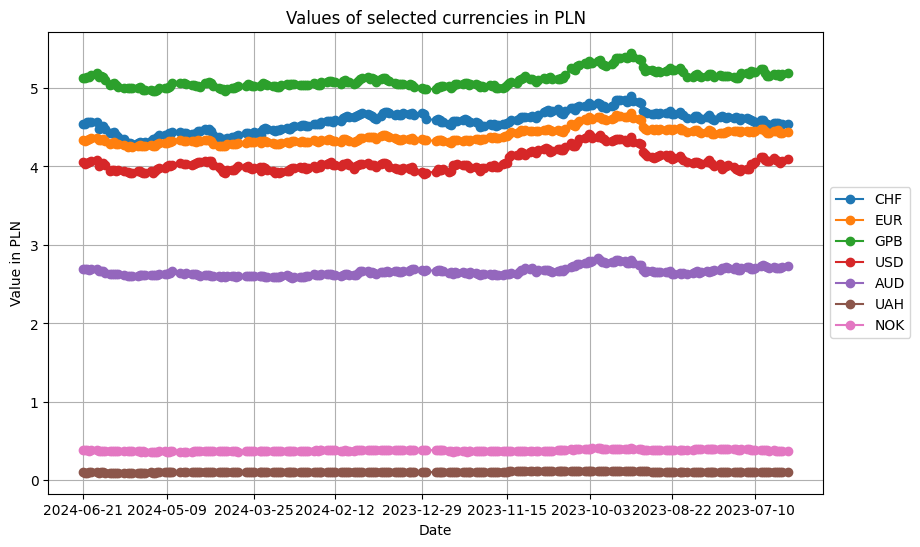

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['CHF'], label='CHF', marker='o')
plt.plot(df.index, df['EUR'], label='EUR', marker='o')
plt.plot(df.index, df['GPB'], label='GPB', marker='o')
plt.plot(df.index, df['USD'], label='USD', marker='o')
plt.plot(df.index, df['AUD'], label='AUD', marker='o')
plt.plot(df.index, df['UAH'], label='UAH', marker='o')
plt.plot(df.index, df['NOK'], label='NOK', marker='o')

plt.xticks(df.index[::30])
plt.title('Values of selected currencies in PLN')
plt.xlabel('Date')
plt.ylabel('Value in PLN')

plt.gca().invert_xaxis()
step = 0,2
yticks_values = np.arange(0, 5.6, 0.1)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

In [28]:
# AVERAGE MONTHLY EXCHANGE RATES:

In [29]:
df.index = pd.to_datetime(df.index)

In [30]:
monthly_avg = df.resample('M').mean()
print(monthly_avg)

                 CHF       EUR       GPB       USD       AUD       UAH  \
Date                                                                     
2023-06-30  4.544800  4.443683  5.175117  4.077667  2.712900  0.110583   
2023-07-31  4.598767  4.442881  5.174905  4.018976  2.706262  0.109000   
2023-08-31  4.652927  4.459773  5.194591  4.087950  2.651377  0.110814   
2023-09-30  4.790752  4.597733  5.335324  4.303348  2.764457  0.116552   
2023-10-31  4.724868  4.513323  5.198568  4.270850  2.713559  0.116918   
2023-11-30  4.566790  4.399705  5.054519  4.069033  2.644190  0.112500   
2023-12-31  4.588284  4.332100  5.026932  3.973347  2.655226  0.107037   
2024-01-31  4.662455  4.365123  5.083909  4.002009  2.659982  0.105727   
2024-02-29  4.574667  4.327500  5.064562  4.010333  2.617681  0.105467   
2024-03-31  4.460771  4.307381  5.036119  3.963638  2.597471  0.102305   
2024-04-30  4.408862  4.302748  5.023962  4.011048  2.612286  0.101776   
2024-05-31  4.353320  4.279990  5.0005

In [31]:
monthly_avg_df = pd.DataFrame(monthly_avg)
monthly_avg_df

,CHF,EUR,GPB,USD,AUD,UAH,NOK
Date,,,,,,,
2023-06-30,4.544800,4.443683,5.175117,4.077667,2.712900,0.110583,0.377883
2023-07-31,4.598767,4.442881,5.174905,4.018976,2.706262,0.109000,0.391286
2023-08-31,4.652927,4.459773,5.194591,4.087950,2.651377,0.110814,0.390777
2023-09-30,4.790752,4.597733,5.335324,4.303348,2.764457,0.116552,0.401319
2023-10-31,4.724868,4.513323,5.198568,4.270850,2.713559,0.116918,0.388564
2023-11-30,4.566790,4.399705,5.054519,4.069033,2.644190,0.112500,0.372852
2023-12-31,4.588284,4.332100,5.026932,3.973347,2.655226,0.107037,0.375811
2024-01-31,4.662455,4.365123,5.083909,4.002009,2.659982,0.105727,0.384927
2024-02-29,4.574667,4.327500,5.064562,4.010333,2.617681,0.105467,0.379995


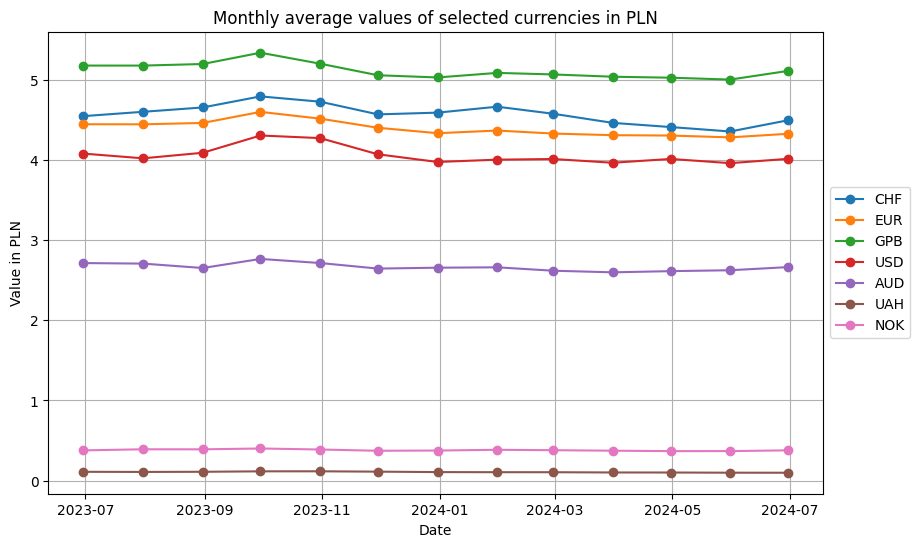

In [32]:
plt.figure(figsize=(10, 6))

plt.plot(monthly_avg_df.index, monthly_avg_df['CHF'], label='CHF', marker='o')
plt.plot(monthly_avg_df.index, monthly_avg_df['EUR'], label='EUR', marker='o')
plt.plot(monthly_avg_df.index, monthly_avg_df['GPB'], label='GPB', marker='o')
plt.plot(monthly_avg_df.index, monthly_avg_df['USD'], label='USD', marker='o')
plt.plot(monthly_avg_df.index, monthly_avg_df['AUD'], label='AUD', marker='o')
plt.plot(monthly_avg_df.index, monthly_avg_df['UAH'], label='UAH', marker='o')
plt.plot(monthly_avg_df.index, monthly_avg_df['NOK'], label='NOK', marker='o')

plt.title('Monthly average values of selected currencies in PLN')
plt.xlabel('Date')
plt.ylabel('Value in PLN')

step = 0,2
yticks_values = np.arange(0, 5.6, 0.1)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

In [33]:
monthly_avg_df.to_excel('data/monthly_avg.xlsx')